# Praktikum 1

#### Langkah 2 : Import Library

In [282]:
# import package
import numpy as np
import pandas as pd

#### Langkah 3 : Baca Data

In [283]:
data = pd.read_csv("C:/Users/Cahyo AP/OneDrive/Dokumen/Semester 5/Machine Learning/Week3/data/dataset.csv")

#### Langkah 4 : Pemahaman Terhadap Data

In [284]:
# Melihat beberapa data awal
data.head()

# Mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Langkah 5 : Visualisasi Data

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

- Import library Matplotlib dan Seaborn untuk visualisasi data

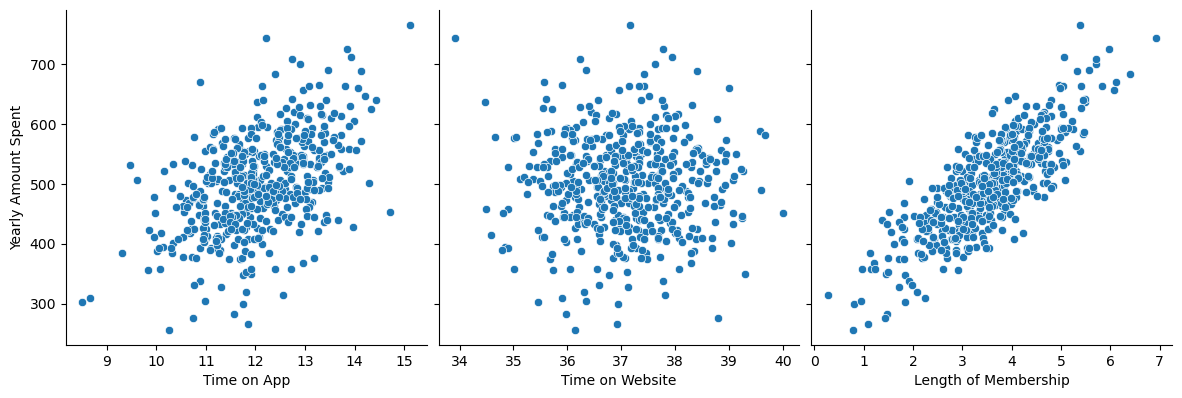

In [286]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

- Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam
bentuk scatter plot

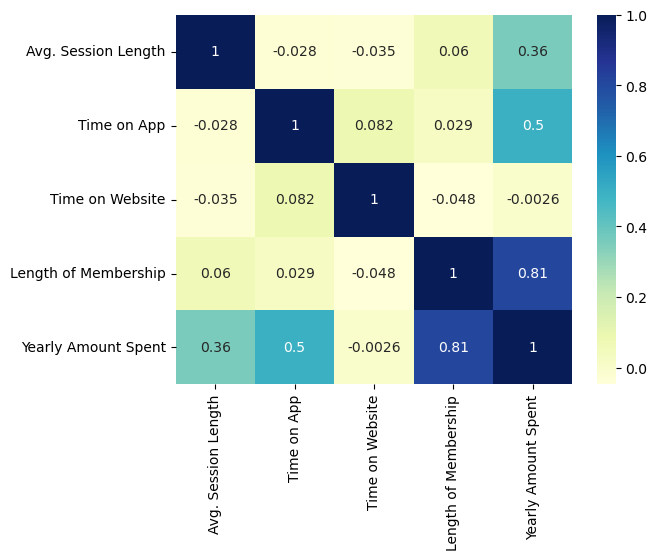

In [287]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

- Gunakan heatmap untuk menampilkan matriks korelasi antar variabel-variabel dalam dataset.
Semakin tinggi nilainya, semakin tinggi korelasinya

#### Langkah 6: Regresi Linier

In [288]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

- Pisahkan variabel bebas (X) dan variabel target (y).

In [289]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split
- Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas 

In [290]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

- Visualisasikan garis regresi pada data latih

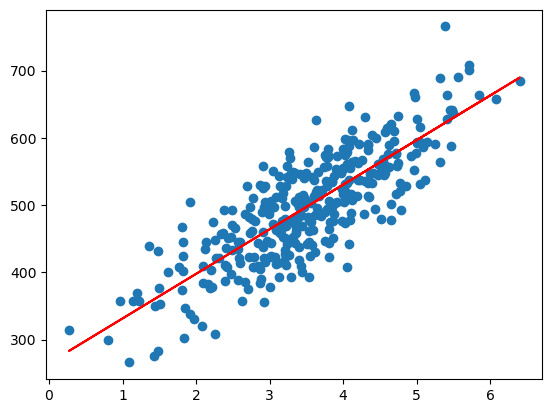

In [291]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

#### Langkah 7 : Analisis Residual

In [292]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

- Lakukan prediksi nilai dari y dari data latih dan hitung residual (selisih antara nilai sebenernya dan nilai prediksi).

<Figure size 640x480 with 0 Axes>

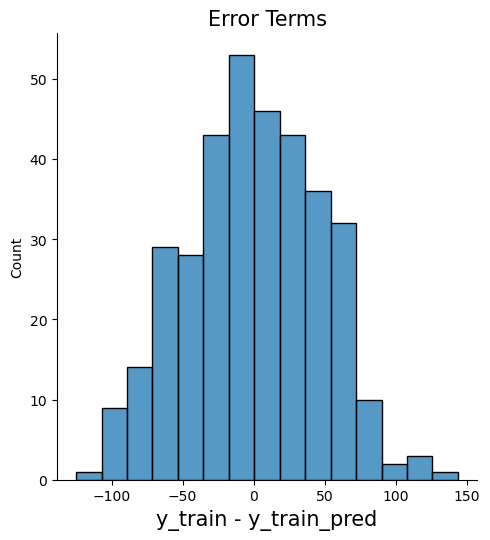

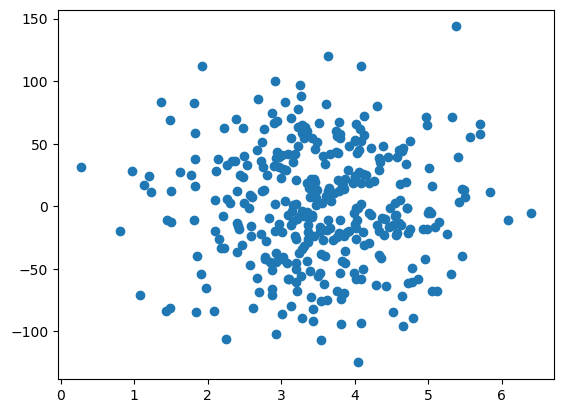

In [293]:
# Histogram residual
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

- Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevakuasi distribusi dan pola error 

#### Langkah 8 : Prediksi pada data Uji dan Evaluasi Model

In [294]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

- Lakukan prediksi pada data uji

In [295]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

- Hitung nilai R-squared untuk mengukur kinerja model pada data uji

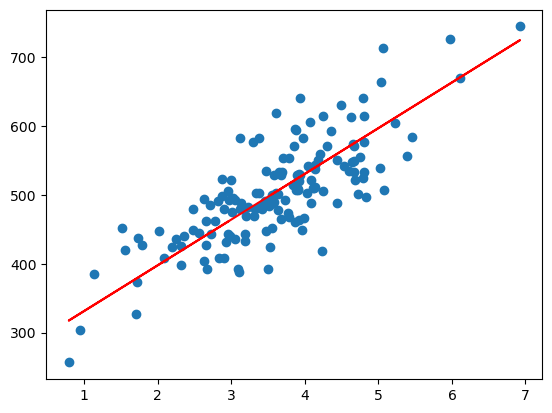

In [296]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

- Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

# Praktikum 2

#### 1. Mengimpor Library :

In [297]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 2. Mengimpor Dataset

In [298]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv("C:/Users/Cahyo AP/OneDrive/Dokumen/Semester 5/Machine Learning/Week3/data/Posisi_gaji.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

#### 3. Feature Scaling :
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [299]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

#### 4. Fitting SVR ke Dataset
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [300]:
# Fitting SVR ke dataset
from sklearn.svm import SVR

# konversi y to 1D array
y = y.ravel()

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

#### 5. Visualisasi SVR
langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

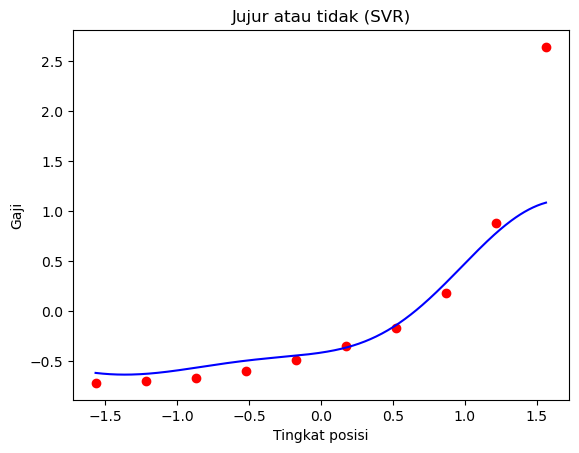

In [301]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

#### 6. Prediksi Hasil:
- Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

- Menskalakan fitur prediksi menggunakan sc_X.transform.

- Melakukan prediksi menggunakan model SVR yang telah dilatih.

- Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.



In [302]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

#### 7. Menampilkan Hasil:
Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [303]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


#### 8. Validasi Hasil :

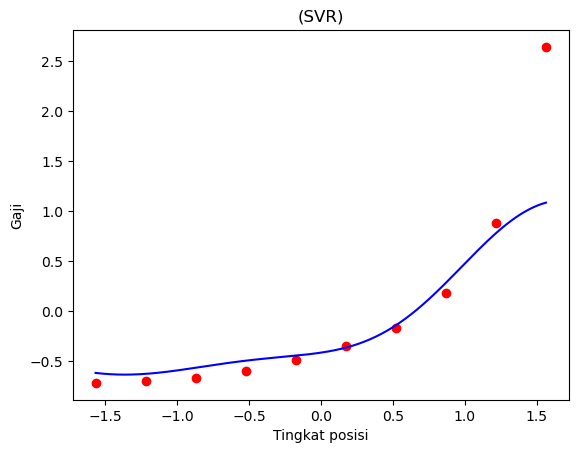

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [304]:
X_grid = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

#### Langkah 9 : Evaluasi Model SVR
Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [305]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Tugas Praktikum

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Muat dataset
df = pd.read_csv("C:/Users/Cahyo AP/OneDrive/Dokumen/Semester 5/Machine Learning/Week3/data/insurance.csv")

# Tampilkan beberapa baris pertama dan info
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


#### Tugas 1 : Multiple Linier Regression

- Pilih Fitur Dan Target

In [307]:
# Tentukan fitur dan target
X = df.drop('charges', axis=1)
y = df['charges']

- Pengkodean Kategorikal dan Skala Fitur :

In [308]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

- Pemisahan Data

In [309]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

- Pelatihan Model dan Prediksi

In [310]:
# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- Evaluasi Model

In [311]:
# Latih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Pembuatan dan Pelatihan Model

In [312]:
# Buat prediksi
y_pred = model.predict(X_test)

- Evaluasi model SVR

In [313]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 33596915.85136148
Mean Absolute Error: 4181.194473753651
R-squared: 0.7835929767120722


- 3.1. Plot Scatter untuk Prediksi vs Nilai Aktual

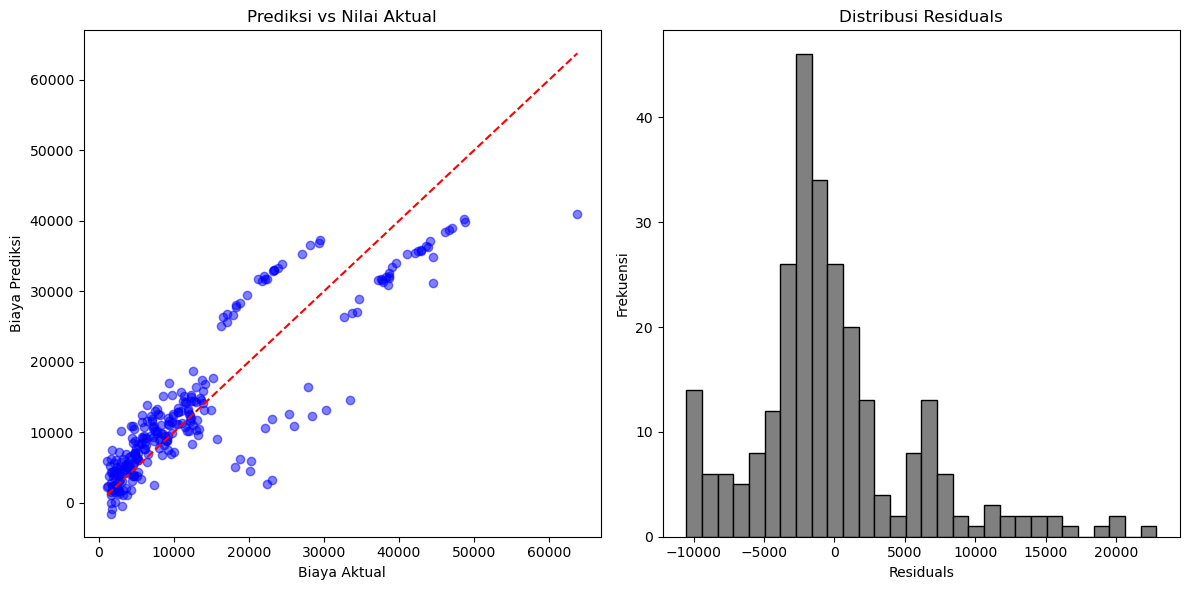

In [314]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Scatter plot untuk prediksi vs nilai aktual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Biaya Aktual')
plt.ylabel('Biaya Prediksi')
plt.title('Prediksi vs Nilai Aktual')

# Histogram residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residuals')

plt.tight_layout()
plt.show()